In [1]:
import sys
import os

# Append the directory of the module to the Python path
sys.path.append("/Users/sherryyang/Projects/super-segger-toolkit")

In [2]:
import cells_extractor
import visualizer

from cell import Cell
from  link_reader import LinkReader

In [3]:
mask = cells_extractor.get_mask_dict("/Users/sherryyang/Documents/wiggins-lab/data/manually_fixed/*")
cell_set, error  = cells_extractor.get_cells_set_by_mask_dict(mask, force = True)

Frame:7, Mask label:21. Pixels number = 9. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:7, Mask label:23. Pixels number = 32. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:8, Mask label:1. Pixels number = 2. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:12, Mask label:46. Pixels number = 1. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:14, Mask label:1. Pixels number = 1. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:23, Mask label:26. Pixels number = 2. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:30, Mask label:59. Pixels number = 1. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:30, Mask label:132. Pixels number = 13. cannot make polygon. A linearring requires at least 4 coordinates.


/Users/sherryyang/Projects/super-segger-toolkit/cells_extractor.py:75: UserWarning: Disconnected multi-pieces found on single mask/cell label
  warnings.warn(f"{e}")


Frame:32, Mask label:115. Pixels number = 7368. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:32, Mask label:149. Pixels number = 32. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:34, Mask label:104. Pixels number = 2. cannot make polygon. A linearring requires at least 4 coordinates.


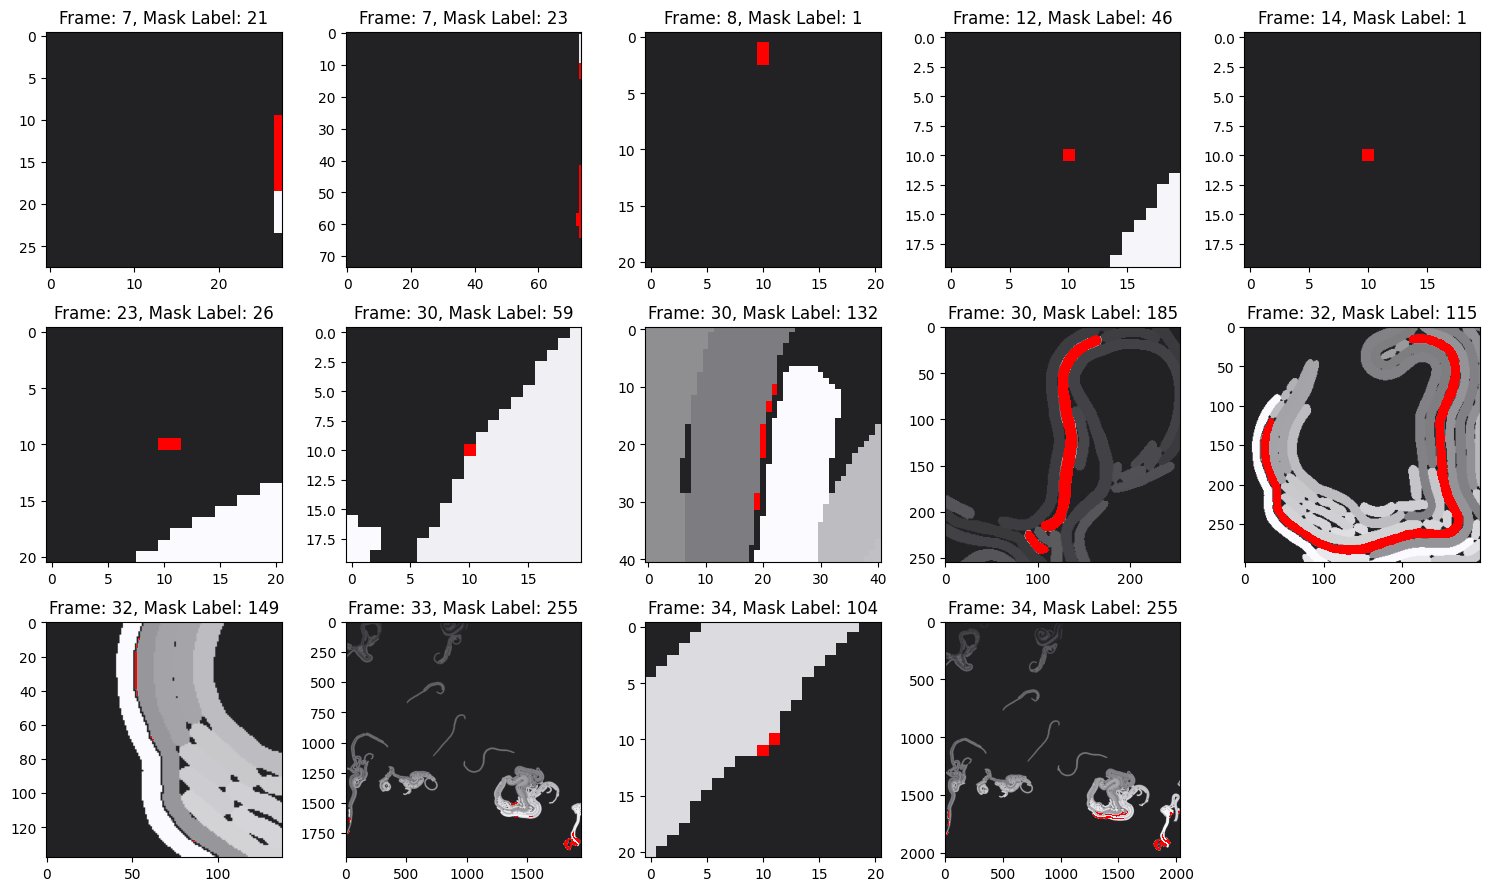

In [4]:
visualizer.plot_error_masks(mask,error)

In [5]:
mask = cells_extractor.get_omnipose_mask_dict("/Users/sherryyang/Documents/wiggins-lab/data/1023/xy5/masks/*.png")
cell_set, error = cells_extractor.get_cells_set_by_mask_dict(mask)

In [34]:
cell_set

{Cell: frame_140, label_43, <-0x18b11377b4224000>,
 Cell: frame_113, label_26, <-0x5e609481e709ffff>,
 Cell: frame_132, label_39, <0x677d39e7cb378003>,
 Cell: frame_133, label_4, <0x575dad212a026004>,
 Cell: frame_138, label_119, <-0x110e3d8fa2d61ff9>,
 Cell: frame_91, label_7, <-0x3e232ce0e3911ff4>,
 Cell: frame_42, label_2, <0x6a355f092800a00e>,
 Cell: frame_83, label_3, <0x50105c21bc8a00f>,
 Cell: frame_110, label_20, <0x4ab086cc4eb0600e>,
 Cell: frame_102, label_16, <-0x722b4690b1f5dfef>,
 Cell: frame_134, label_85, <-0x54d9494713bc7fed>,
 Cell: frame_94, label_12, <0xe0306cecd63e014>,
 Cell: frame_140, label_128, <0x7d6cdd9374536018>,
 Cell: frame_131, label_79, <0x5437d20721fde020>,
 Cell: frame_137, label_10, <0x3dca04b62a542021>,
 Cell: frame_123, label_75, <-0x68a3fb55dea85fdd>,
 Cell: frame_84, label_4, <-0x60b8d65894da9fdc>,
 Cell: frame_124, label_40, <-0x78c3881c7fdd7fdc>,
 Cell: frame_103, label_17, <0x6524f8111d66e026>,
 Cell: frame_116, label_36, <-0x359f55798083bfd9>,


In [28]:
# cell_list will be sort by frame and label in order, by simply run sort the list of cell
cell_list = list(cell_set)
cell_list.sort()
cell_list

[Cell: frame_0, label_1, <-0x1b119000fefce840>,
 Cell: frame_1, label_1, <0x746be2e2370f37ea>,
 Cell: frame_2, label_1, <0x5e4c03d9f61c5545>,
 Cell: frame_3, label_1, <0x7983f36362147888>,
 Cell: frame_4, label_1, <0x236b5661b35cb5c>,
 Cell: frame_5, label_1, <0x2feba1fad72db60d>,
 Cell: frame_6, label_1, <0x6fe1fd163d3a0ec9>,
 Cell: frame_7, label_1, <-0x6933c73583b8d3dc>,
 Cell: frame_8, label_1, <0x74fa0d97683f4f67>,
 Cell: frame_9, label_1, <-0x2533065de9f5dc5>,
 Cell: frame_10, label_1, <0x2b61bc2edd588cec>,
 Cell: frame_11, label_1, <-0x4beb81ce69862040>,
 Cell: frame_12, label_1, <-0x6dbdad017d8dfcfd>,
 Cell: frame_13, label_1, <0x707027cb6e6a2646>,
 Cell: frame_14, label_1, <0x48aa0195f78b4088>,
 Cell: frame_15, label_1, <0x26d7d662e38363cb>,
 Cell: frame_16, label_1, <-0x5075679a635b4961>,
 Cell: frame_17, label_1, <-0x724792cd7763261e>,
 Cell: frame_18, label_1, <0x65f246fd11bdf424>,
 Cell: frame_19, label_1, <0x44201bc9fdb61767>,
 Cell: frame_20, label_1, <0x5f580b5369ae3aaa

In [35]:
for cell in cell_list[:5]:
    print(cell.frame, cell.label, cell.polygon.area, cell.polygon.centroid.x, cell.polygon.centroid.y, cell.polygon.)

0 1 210.5 158.7711797307997 166.20348376880443
1 1 216.0 158.93364197530863 166.42824074074073
2 1 221.0 158.78582202111613 166.33031674208144
3 1 234.5 158.78322672352522 166.28926794598436
4 1 234.0 158.94230769230768 166.49358974358975


In [38]:
cell1 = cell_list[-1]
cell2 = cell_list[-2]

In [39]:
cell1.polygon.crosses(cell2.polygon)

False

In [40]:
cell1.polygon.distance(cell2.polygon)

0.7071067811865475

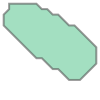

In [41]:
cell1.polygon.difference(cell2.polygon)

In [8]:
spots_filename = "/Users/sherryyang/Documents/wiggins-lab/data/spots-simple.csv"
edge_filename = "/Users/sherryyang/Documents/wiggins-lab/data/tracks-simple.csv"
G1 = reader.abstract_trackmate_linking_result(spots_filename, edge_filename)

In [9]:
G1

In [10]:
spots_filename = "/Users/sherryyang/Documents/wiggins-lab/data/spots_kalman_lap_1115.csv"
edge_filename = "/Users/sherryyang/Documents/wiggins-lab/data/tracks_kalman_lap_1115.csv"
G2 = reader.abstract_trackmate_linking_result(spots_filename, edge_filename)

In [11]:
spots_filename = "/Users/sherryyang/Documents/wiggins-lab/data/spots_simple_lap_1115.csv"
edge_filename = "/Users/sherryyang/Documents/wiggins-lab/data/tracks_simple_lap_1115.csv"
G3 = reader.abstract_trackmate_linking_result(spots_filename, edge_filename)

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

In [24]:
pos = visualizer.get_lineage_pos(G1)
tag_dict = visualizer.tag_type(G1)
node_colors, node_sizes, edge_colors = visualizer.mark_cell_style(G1, tag_dict)

In [26]:
# dict of "Death" (set of cell node), "Birth"  (set of cell node), "Split" (set of edge), "Merge" (set of edge)
tag_dict

{'death': {Cell: frame_128, label_43, <0x39fb0988ca6ed4bd>,
  Cell: frame_132, label_52, <0x2f56bb7b86b1cae5>,
  Cell: frame_140, label_1, <-0x677c6abf90bef71c>,
  Cell: frame_140, label_2, <-0xd2ca1f5a76e8fc3>,
  Cell: frame_140, label_3, <-0x511452dd4409f2f1>,
  Cell: frame_140, label_4, <0x93b75eca5467468>,
  Cell: frame_140, label_5, <-0x77b655b77754eec6>,
  Cell: frame_140, label_6, <-0x1d668ced8e04876d>,
  Cell: frame_140, label_7, <0x3ce93bdc5b4bdfec>,
  Cell: frame_140, label_8, <-0x6fe750b414f8342>,
  Cell: frame_140, label_9, <0x535153bea800e417>,
  Cell: frame_140, label_10, <-0x2da077e5749a7f17>,
  Cell: frame_140, label_11, <0x2caf50e474b5e842>,
  Cell: frame_140, label_12, <-0x1738600327e57aec>,
  Cell: frame_140, label_13, <0x431768c6c16aec6d>,
  Cell: frame_140, label_14, <0x605d16d42abb53c6>,
  Cell: frame_140, label_15, <0x1c7565ec8e1ff098>,
  Cell: frame_140, label_16, <0x76c52eb6777057f1>,
  Cell: frame_140, label_17, <0x32dd7dcedad4f4c3>,
  Cell: frame_140, label_1

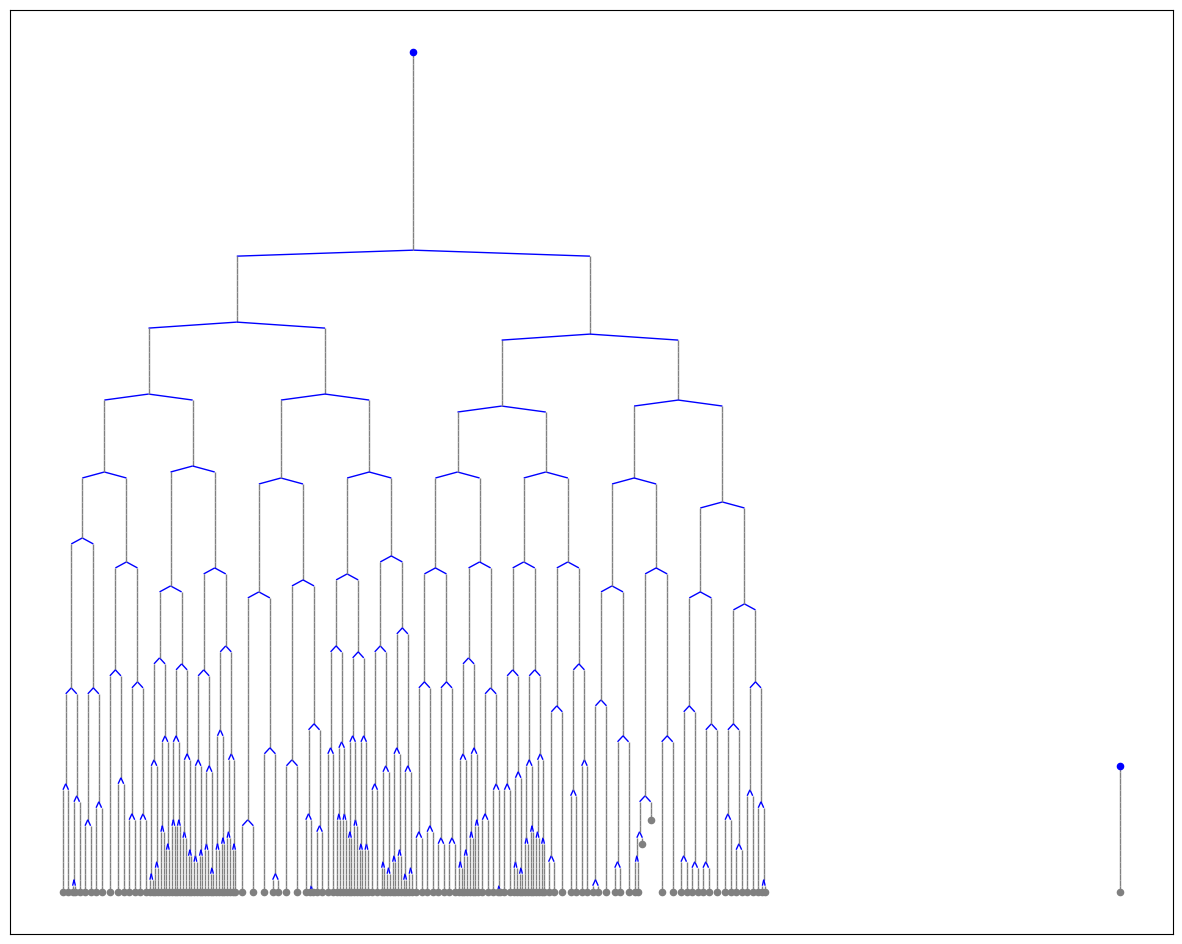

In [17]:
plt.figure(figsize=(15, 12)) 
for node in G1.nodes():
    nx.draw_networkx_nodes(G1, pos, nodelist=[node], node_size=node_sizes[node], node_color=node_colors[node])
# Draw each edge individually
for edge in G1.edges():
    nx.draw_networkx_edges(G1, pos, edgelist=[edge], width=1, edge_color=edge_colors[edge], arrows= False)

# Trackmate overlap result

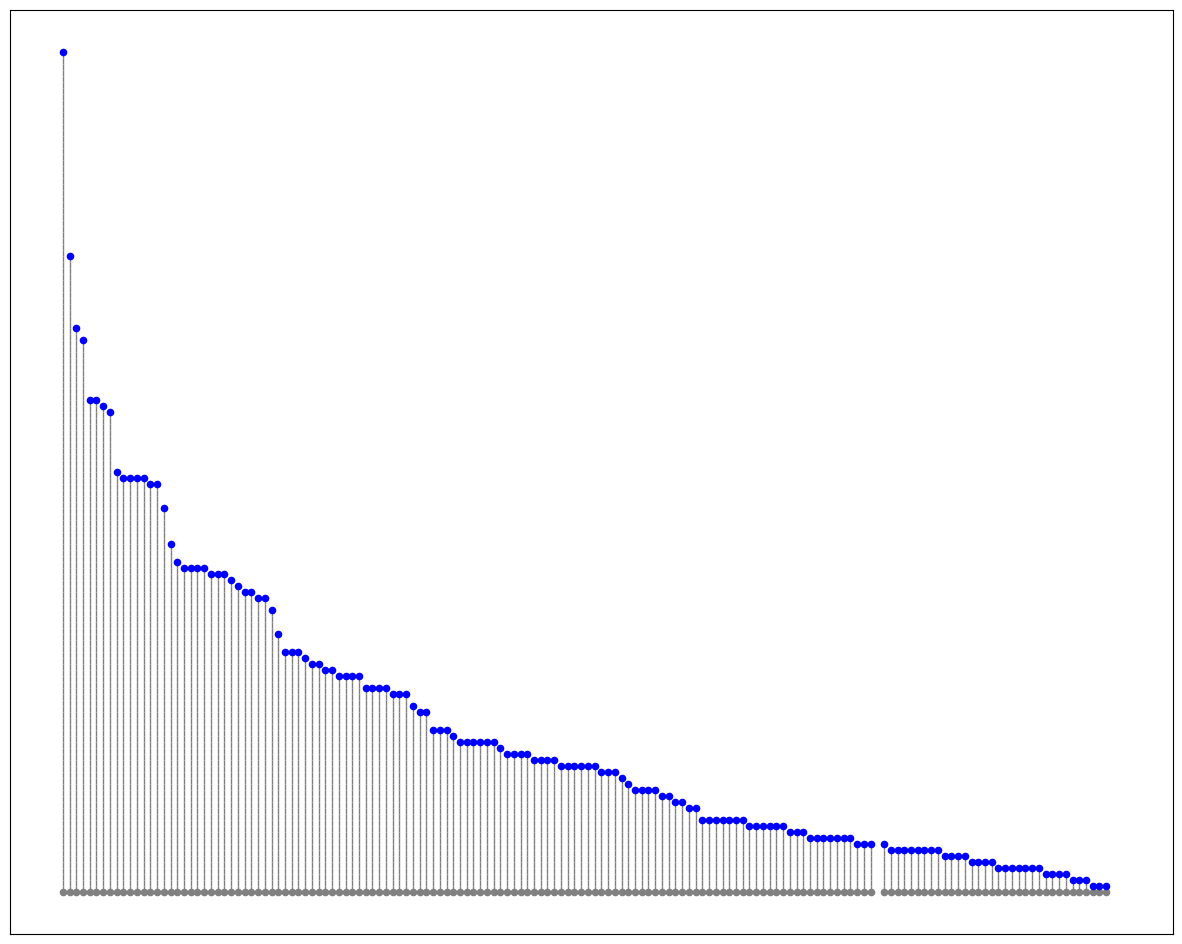

In [18]:
pos = visualizer.get_lineage_pos(G2)
tag_dict = visualizer.tag_type(G2)
node_colors, node_sizes, edge_colors = visualizer.mark_cell_style(G2, tag_dict)

plt.figure(figsize=(15, 12)) 
for node in G2.nodes():
    nx.draw_networkx_nodes(G2, pos, nodelist=[node], node_size=node_sizes[node], node_color=node_colors[node])
# Draw each edge individually
for edge in G2.edges():
    nx.draw_networkx_edges(G2, pos, edgelist=[edge], width=1, edge_color=edge_colors[edge], arrows= False)

# This algoirthm kalman filter, CANNOT detect merge and split, but it's good at speed and momentum. 

In [21]:
# overall tracking intersection
len(set(G1.edges()).intersection(set(G2.edges())))

4209

In [22]:
# overall same ratio score
len(set(G1.edges()).intersection(set(G2.edges())))/ len(set(G1.edges()).union(set(G2.edges())))

0.957679180887372

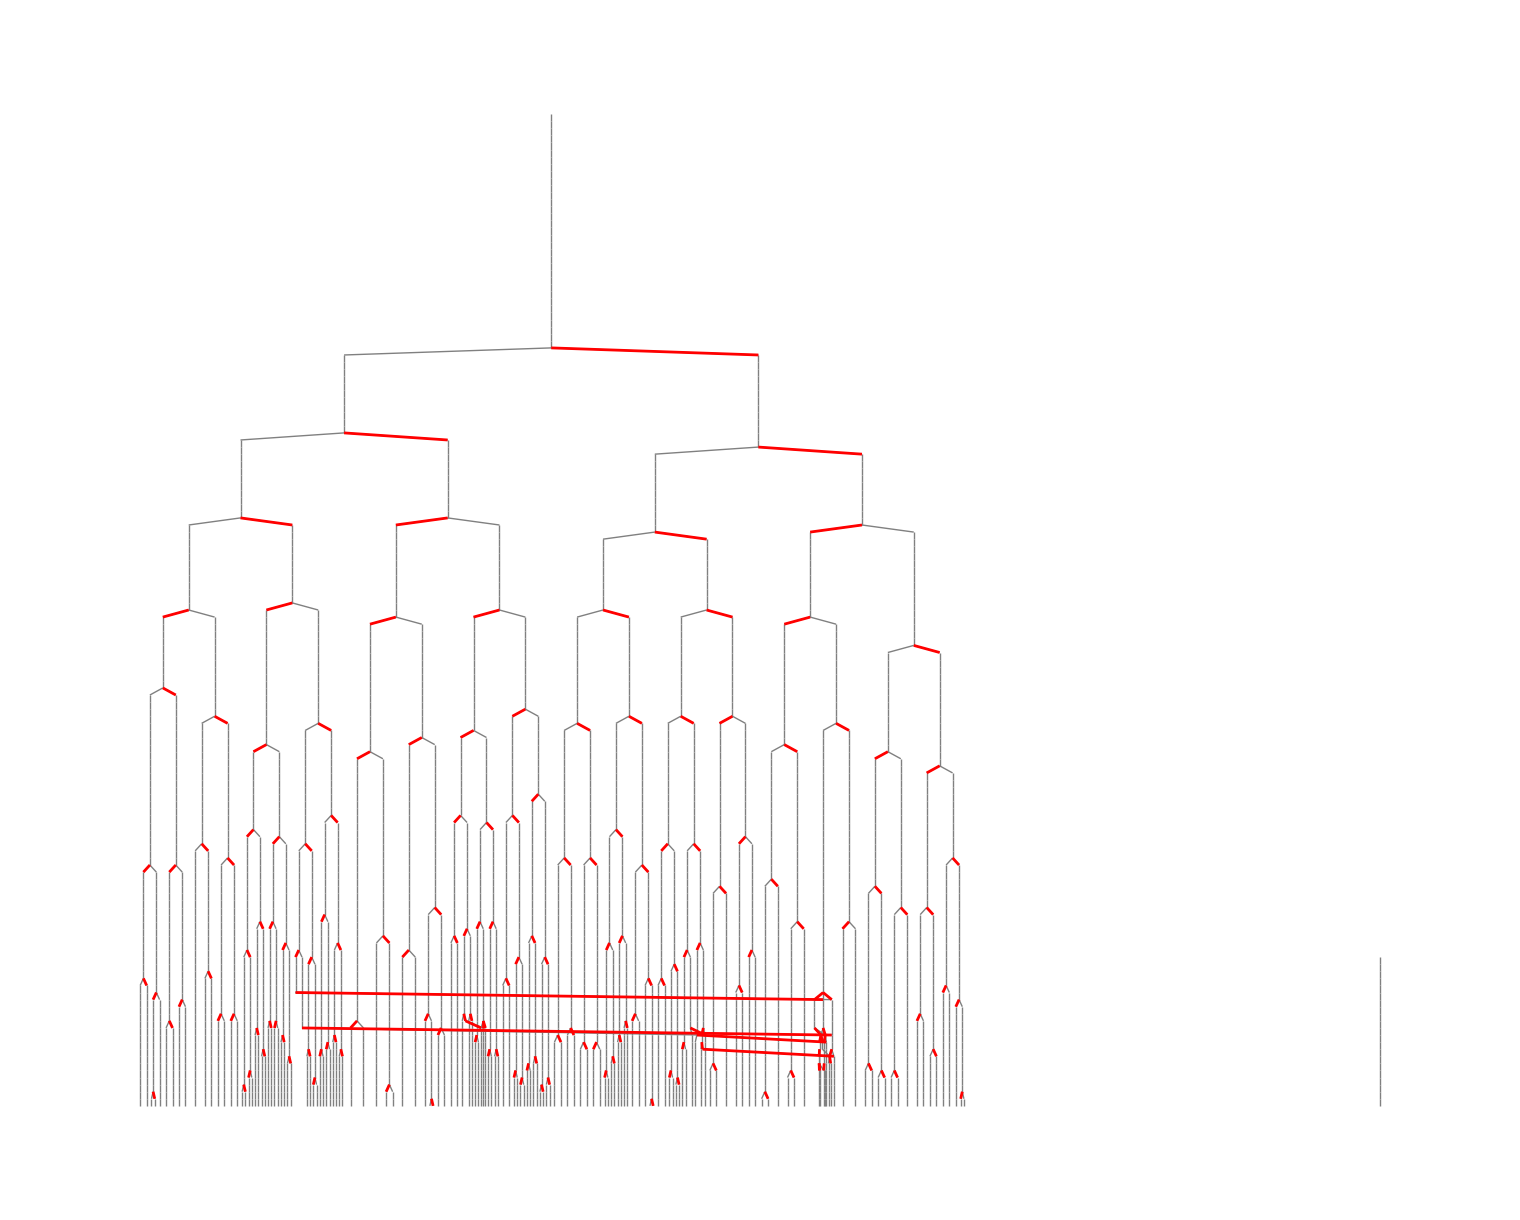

In [46]:
G_combined = nx.compose(G1, G2)
G1_extra_edge = set(G1.edges()).difference(set(G2.edges()))

pos = visualizer.get_lineage_pos(G_combined)

plt.figure(figsize=(15, 12)) 
nx.draw(G_combined, pos, node_size = 0,  width=1, edge_color="grey", arrows = False)
nx.draw_networkx_edges(G_combined, pos, edgelist=G1_extra_edge, width=2, edge_color="red", arrows= False)